Construction Project - data analysis from field apps related to construction and PM works
Table of Contents

1.Introduction 2.Data description and cleaning 3.Data Analysis 4.Conclusion

Currently, i am in the learning process of Data Science and analytics. i wanted to test my learning skills to see what insights i draw from this construction data set.

The dataset is made up of a various projects and generated from project manmagement field apps which are used for quality, safety and site management. There are two files in the dataset, namely Construction Data PM Forms and Construction Data PM Tasks: -

Forms - generated from a checklist for quality/safety/site management

Ref - form item reference number Status - status of action Location - location of checklist item (i.e. field app/location on site) Name - form name Created - date the form was created Type - origins of the form(i.e. site management inspections/safety inspections/permits/other etc.) Status Changed - date when actionable task was completed Open Actions - unknown Total Actions - unknown Association - unknown Overdue - if the form action was overdue (i.e. True/False) Images - supporting images associated with form Comments - supporting comments associated with form Documents - supporting documents associated with form Project - project ID Report Forms Status - status of reporting form (i.e. open/closed) Report Forms Group - group associated with form (i.e. Quality/Site management/Other)

Tasks - an action item typically used for quality snags/defects/safety issues

Ref - task item reference number Status - status of action (i.e. open/closed/EHS good observation/other) Location - where the task has derived from (i.e. EHS management inspection/EHS form/other) Description - description of project management task Created - date item was created Target - unknown Type - traffic light system (i.e. Safety notice Amber/Safety notice Green/Other) To Package - trade package which was required to action the task (i.e. main contractor/precast concrete/ceilings & partitions etc.) Status Changed - date when actionable task was completed Association - unknown Overdue - if the task action was overdue (i.e. True/False) Images - supporting images associated with task Comments - supporting comments associated with task Documents - supporting documents associated with task Priority - priority of task Cause - reason for creating task item (i.e. house keeping/safety access/other etc.) Project - project ID Report Status - status of reporting task (i.e. open/closed) Task Group - group associated with task (i.e. Safety/Site management/Other)

Data Description and Cleaning The data is in the form of two csv files and I have used Python and the Pandas Library to read the file and clean the data (i.e. locate any duplicates, or missing values).
2.1 Data Description import libraries read the data from the csv file determine the data types in the file understand the data shape

In [2]:
import pandas as pd
import numpy as np
import os, sys
import sqlite3
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
#import plotly.offline as offline
#offline.init_notebook_mode(connected=True)

In [4]:
file_path=r'C:\Users\pabba\OneDrive\Documents\Kaggle datasets\Construction_Data_PM_Forms_All_Projects.csv'
pf_forms=pd.read_csv(file_path)
pf_forms.head()

Ref                Status  \
0  F145185.4                Opened   
1  F1.495500  Open / Ongoing Works   
2  F1.495499  Open / Ongoing Works   
3  F1.495498  Open / Ongoing Works   
4  F1.495496  Open / Ongoing Works   

                                            Location  \
0  01 Daily Site Diary>Site Management>JPC Projec...   
1  02 Daily Work Plan>Site Management>JPC Project...   
2  02 Daily Work Plan>Site Management>JPC Project...   
3  02 Daily Work Plan>Site Management>JPC Project...   
4  02 Daily Work Plan>Site Management>JPC Project...   

                             Name     Created                       Type  \
0   1328 CM-SM-FRM-001 Site Diary  15/09/2020            Site Management   
1  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
2  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
3  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
4  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   

  Status Changed  Open Actions  Total Actions Association  OverDue  Images  \
0     15/09/2020             0              0         NaN    False    True   
1     15/09/2020             0              0         NaN    False   False   
2     15/09/2020             0              0         NaN    False   False   
3     15/09/2020             0              0         NaN    False   False   
4     15/09/2020             0              0         NaN    False   False   

   Comments Documents  Project Report Forms Status Report Forms Group  
0     False     False     1328                Open    Site Management  
1     False     False     1328                Open      Subcontractor  
2     False     False     1328                Open      Subcontractor  
3     False     False     1328                Open      Subcontractor  
4     False     False     1328                Open      Subcontractor

In [5]:
file_path=r'C:\Users\pabba\OneDrive\Documents\Kaggle datasets\Construction_Data_PM_Tasks_All_Projects.csv'
pf_tasks=pd.read_csv(file_path)
pf_tasks.head()

Ref                Status  \
0  T1.23963030                  Open   
1  T116412.200                Closed   
2   T141663.27  EHS Good Observation   
3  T116412.199                Closed   
4   T141663.26  EHS Good Observation   

                                            Location  \
0  JPC Project Management>EHS Management>01 Inspe...   
1  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
2  JPC Project Management>EHS Management>01 Inspe...   
3  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
4  JPC Project Management>EHS Management>01 Inspe...   

                                         Description     Created  Target  \
0  task raised in incorrect location of this form...  14/09/2020     NaN   
1                                             Metsec  14/09/2020     NaN   
2  Good clear exclusion zones and access through ...  14/09/2020     NaN   
3                                           RC walls  14/09/2020     NaN   
4  block 02 working level has good housekeeping, ...  14/09/2020     NaN   

                                       Type             To Package  \
0     Safety Notice (Amber) - General Issue        Main Contractor   
1                      JPC - Progress Photo  Ceilings & Partitions   
2  Safety Notice (Green) - Good Observation        Main Contractor   
3                      JPC - Progress Photo       Precast Concrete   
4  Safety Notice (Green) - Good Observation       Precast Concrete   

  Status Changed Association  OverDue Images Comments Documents  \
0     14/09/2020  FormAnswer    False    NaN      NaN       NaN   
1     14/09/2020         NaN    False   True    False     False   
2     14/09/2020  FormAnswer    False   True    False     False   
3     14/09/2020         NaN    False   True    False     False   
4     14/09/2020  FormAnswer    False   True    False     False   

              Priority                         Cause  project Report Status  \
0  Behavioural Failure  JPC - Safety - Documentation     1328          Open   
1                  NaN                           NaN     1328        Closed   
2                  NaN         JPC - Safety - Access     1328        Closed   
3                  NaN                           NaN     1328        Closed   
4                  NaN  JPC - Safety - House Keeping     1328        Closed   

        Task Group  
0           Safety  
1  Site Management  
2           Safety  
3  Site Management  
4           Safety

In [6]:
pf_tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12424 entries, 0 to 12423
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ref             12424 non-null  object 
 1   Status          12424 non-null  object 
 2   Location        12424 non-null  object 
 3   Description     12424 non-null  object 
 4   Created         12424 non-null  object 
 5   Target          2568 non-null   float64
 6   Type            12424 non-null  object 
 7   To Package      11382 non-null  object 
 8   Status Changed  12424 non-null  object 
 9   Association     9483 non-null   object 
 10  OverDue         12424 non-null  bool   
 11  Images          12272 non-null  object 
 12  Comments        11902 non-null  object 
 13  Documents       11780 non-null  object 
 14  Priority        2366 non-null   object 
 15  Cause           9683 non-null   object 
 16  project         12424 non-null  int64  
 17  Report Status   12424 non-null 

In [9]:
pf_tasks.shape()

TypeError: 'tuple' object is not callable

In [11]:
pf_tasks['Created']=pd.to_datetime(pf_tasks['Created'], format='%d/%m/%Y')
pf_tasks.head(5)

Ref                Status  \
0  T1.23963030                  Open   
1  T116412.200                Closed   
2   T141663.27  EHS Good Observation   
3  T116412.199                Closed   
4   T141663.26  EHS Good Observation   

                                            Location  \
0  JPC Project Management>EHS Management>01 Inspe...   
1  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
2  JPC Project Management>EHS Management>01 Inspe...   
3  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
4  JPC Project Management>EHS Management>01 Inspe...   

                                         Description    Created  Target  \
0  task raised in incorrect location of this form... 2020-09-14     NaN   
1                                             Metsec 2020-09-14     NaN   
2  Good clear exclusion zones and access through ... 2020-09-14     NaN   
3                                           RC walls 2020-09-14     NaN   
4  block 02 working level has good housekeeping, ... 2020-09-14     NaN   

                                       Type             To Package  \
0     Safety Notice (Amber) - General Issue        Main Contractor   
1                      JPC - Progress Photo  Ceilings & Partitions   
2  Safety Notice (Green) - Good Observation        Main Contractor   
3                      JPC - Progress Photo       Precast Concrete   
4  Safety Notice (Green) - Good Observation       Precast Concrete   

  Status Changed Association  OverDue Images Comments Documents  \
0     14/09/2020  FormAnswer    False    NaN      NaN       NaN   
1     14/09/2020         NaN    False   True    False     False   
2     14/09/2020  FormAnswer    False   True    False     False   
3     14/09/2020         NaN    False   True    False     False   
4     14/09/2020  FormAnswer    False   True    False     False   

              Priority                         Cause  project Report Status  \
0  Behavioural Failure  JPC - Safety - Documentation     1328          Open   
1                  NaN                           NaN     1328        Closed   
2                  NaN         JPC - Safety - Access     1328        Closed   
3                  NaN                           NaN     1328        Closed   
4                  NaN  JPC - Safety - House Keeping     1328        Closed   

        Task Group  
0           Safety  
1  Site Management  
2           Safety  
3  Site Management  
4           Safety

In [12]:
pf_tasks['Status Changed']=pd.to_datetime(pf_tasks['Status Changed'], format='%d/%m/%Y')
pf_tasks.head(5)

Ref                Status  \
0  T1.23963030                  Open   
1  T116412.200                Closed   
2   T141663.27  EHS Good Observation   
3  T116412.199                Closed   
4   T141663.26  EHS Good Observation   

                                            Location  \
0  JPC Project Management>EHS Management>01 Inspe...   
1  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
2  JPC Project Management>EHS Management>01 Inspe...   
3  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
4  JPC Project Management>EHS Management>01 Inspe...   

                                         Description    Created  Target  \
0  task raised in incorrect location of this form... 2020-09-14     NaN   
1                                             Metsec 2020-09-14     NaN   
2  Good clear exclusion zones and access through ... 2020-09-14     NaN   
3                                           RC walls 2020-09-14     NaN   
4  block 02 working level has good housekeeping, ... 2020-09-14     NaN   

                                       Type             To Package  \
0     Safety Notice (Amber) - General Issue        Main Contractor   
1                      JPC - Progress Photo  Ceilings & Partitions   
2  Safety Notice (Green) - Good Observation        Main Contractor   
3                      JPC - Progress Photo       Precast Concrete   
4  Safety Notice (Green) - Good Observation       Precast Concrete   

  Status Changed Association  OverDue Images Comments Documents  \
0     2020-09-14  FormAnswer    False    NaN      NaN       NaN   
1     2020-09-14         NaN    False   True    False     False   
2     2020-09-14  FormAnswer    False   True    False     False   
3     2020-09-14         NaN    False   True    False     False   
4     2020-09-14  FormAnswer    False   True    False     False   

              Priority                         Cause  project Report Status  \
0  Behavioural Failure  JPC - Safety - Documentation     1328          Open   
1                  NaN                           NaN     1328        Closed   
2                  NaN         JPC - Safety - Access     1328        Closed   
3                  NaN                           NaN     1328        Closed   
4                  NaN  JPC - Safety - House Keeping     1328        Closed   

        Task Group  
0           Safety  
1  Site Management  
2           Safety  
3  Site Management  
4           Safety

In [13]:
pf_tasks['Task Group'].unique()

array(['Safety', 'Site Management', 'Quality', 'Design Team', nan],
      dtype=object)

In [14]:
print('Number of Projects: ', pf_tasks['project'].nunique())
print('Number of Trade Packages: ', pf_tasks['To Package'].nunique())
print('Number of Task Groups: ', pf_tasks['Task Group'].nunique())

Number of Projects:  8
Number of Trade Packages:  105
Number of Task Groups:  4


The dataset is made up of 8 construction projects, 106 different trades and each task is categorised into either 'Safety', 'Site Management', 'Quality' or 'Design Team'.

2.2 Data Cleaning
locate any missing values
check for duplicated items

In [15]:
missing_values_count = pf_tasks.isnull().sum()
missing_values_count[:]

Ref                   0
Status                0
Location              0
Description           0
Created               0
Target             9856
Type                  0
To Package         1042
Status Changed        0
Association        2941
OverDue               0
Images              152
Comments            522
Documents           644
Priority          10058
Cause              2741
project               0
Report Status         0
Task Group           50
dtype: int64

In [20]:
total_cells=np.product(pf_tasks.shape)
#how to find total missing values
total_missing=missing_values_count.sum()
#how to calculate percentage of data is missing
((total_missing/total_cells) * 100).round(2)

11.86

Overall, the dataset has approximatelty 11.86% of missing data.

The columns with missing values include Target, To Package, Association, Images, Comments, Documents, Priority, Cause and Task Group. With the exception of the Target column, the rest are all columns with string values. The Priority column has over 10,000 missing values. If we were to drop these rows our dataset would be reduced significantly. Let's review the data and find a methodical approach to fill the missing values.

In [21]:
pf_tasks['Priority'].value_counts()

Behavioural Failure                                                 951
System Failure                                                      787
Medium                                                              221
High                                                                214
Best Practice                                                        83
System Failure - Deviation from RAMS / Manufacturer Instructions     31
Low                                                                  29
.                                                                    27
2 Week Look Ahead                                                    13
Low (resolve within 2 weeks)                                          3
Medium (resolve within 5 days)                                        2
High (resolve within 48 hours)                                        2
1 Week Look Ahead                                                     2
1 Month Look Ahead                                              

Behavioural Failure is the most applied in the Priority column. The tasks associated with this category relate to Safety.

In [22]:
pf_tasks.loc[(pf_tasks['Priority'].isnull()) & (pf_tasks['Task Group']=='Safety'), 'Priority']='Behavioural Failure'

In [26]:
#check if change applied 
pf_tasks.loc[pf_tasks['Task Group'] == 'Safety']

Ref                Status  \
0      T1.23963030                  Open   
2       T141663.27  EHS Good Observation   
4       T141663.26  EHS Good Observation   
6       T141663.25  EHS Good Observation   
8       T141663.24  EHS Good Observation   
...            ...                   ...   
12419    T122039.5                Closed   
12420    T122039.3  EHS Good Observation   
12421    T122039.1                Closed   
12422    T120669.2                Closed   
12423    T120669.1                Closed   

                                                Location  \
0      JPC Project Management>EHS Management>01 Inspe...   
2      JPC Project Management>EHS Management>01 Inspe...   
4      JPC Project Management>EHS Management>01 Inspe...   
6      JPC Project Management>EHS Management>01 Inspe...   
8      JPC Project Management>EHS Management>01 Inspe...   
...                                                  ...   
12419                              1345 - DUB062 Project   
12420                              1345 - DUB062 Project   
12421                              1345 - DUB062 Project   
12422                              1345 - DUB062 Project   
12423                              1345 - DUB062 Project   

                                             Description    Created  Target  \
0      task raised in incorrect location of this form... 2020-09-14     NaN   
2      Good clear exclusion zones and access through ... 2020-09-14     NaN   
4      block 02 working level has good housekeeping, ... 2020-09-14     NaN   
6      operaiver using hand sanitizer points onsite. ... 2020-09-14     NaN   
8                number of operative fully pee compliant 2020-09-14     NaN   
...                                                  ...        ...     ...   
12419  Extend temp road and get IAC to install requir... 2020-03-11     NaN   
12420                              Canteen in condition  2020-03-11     NaN   
12421                        Complete drying room set up 2020-03-11     NaN   
12422  ga1 not available for some plant on site. requ... 2020-02-20     NaN   
12423                        light in toilet not working 2020-02-20     NaN   

                                           Type             To Package  \
0         Safety Notice (Amber) - General Issue        Main Contractor   
2      Safety Notice (Green) - Good Observation        Main Contractor   
4      Safety Notice (Green) - Good Observation       Precast Concrete   
6      Safety Notice (Green) - Good Observation  Ceilings & Partitions   
8      Safety Notice (Green) - Good Observation        Main Contractor   
...                                         ...                    ...   
12419     Safety Notice (Amber) - General Issue        Main Contractor   
12420  Safety Notice (Green) - Good Observation        Main Contractor   
12421     Safety Notice (Amber) - General Issue        Main Contractor   
12422     Safety Notice (Amber) - General Issue        Main Contractor   
12423     Safety Notice (Amber) - General Issue        Main Contractor   

      Status Changed Association  OverDue Images Comments Documents  \
0         2020-09-14  FormAnswer    False    NaN      NaN       NaN   
2         2020-09-14  FormAnswer    False   True    False     False   
4         2020-09-14  FormAnswer    False   True    False     False   
6         2020-09-14  FormAnswer    False   True    False     False   
8         2020-09-14  FormAnswer    False  False    False     False   
...              ...         ...      ...    ...      ...       ...   
12419     2020-03-23  FormAnswer    False   True     True     False   
12420     2020-03-11  FormAnswer    False   True    False     False   
12421     2020-03-19  FormAnswer    False   True     True     False   
12422     2020-02-28  FormAnswer    False  False     True      True   
12423     2020-02-27  FormAnswer    False   True    False     False   

                  Priority                              Cause  project  \


In [27]:
#the remaining rows can be filled with Other.
pf_tasks['Priority'] = pf_tasks['Priority'].fillna('Other')
pf_tasks['Priority']

0        Behavioural Failure
1                      Other
2        Behavioural Failure
3                      Other
4        Behavioural Failure
                ...         
12419         System Failure
12420    Behavioural Failure
12421         System Failure
12422    Behavioural Failure
12423    Behavioural Failure
Name: Priority, Length: 12424, dtype: object

In [28]:
pf_tasks['Target'].value_counts()

44011.0    75
44015.0    67
43998.0    52
43966.0    46
44070.0    43
           ..
43814.0     1
43792.0     1
43759.0     1
43760.0     1
43843.0     1
Name: Target, Length: 255, dtype: int64

In [29]:
pf_tasks['Target'].unique()

array([   nan, 44094., 44091., 44090., 44089., 44088., 44087., 44083.,
       44082., 44084., 44081., 44076., 44075., 44074., 44070., 44069.,
       44068., 44061., 44059., 44032., 44027., 44026., 44020., 44013.,
       44019., 44018., 44017., 44014., 44012., 44011., 44010., 44007.,
       43999., 44006., 44005., 43997., 44004., 44003., 43998., 43993.,
       43991., 43986., 43992., 43985., 43978., 43928., 43922., 43921.,
       43915., 43909., 43908., 43907., 43906., 43901., 43902., 43900.,
       43899., 43892., 43896., 43895., 43894., 43893., 43885., 43889.,
       43887., 43886., 43879., 43875., 43868., 43874., 43867., 43873.,
       43864., 43881., 43866., 43865., 43852., 43850., 43846., 43843.,
       43840., 43823., 43815., 43811., 43803., 43808., 43805., 43773.,
       43810., 43802., 43801., 43796., 43795., 43812., 43794., 43781.,
       43782., 43787., 43784., 43776., 43775., 43771., 43770., 43769.,
       43768., 43767., 43762., 43760., 43753., 43752., 43748., 43747.,
      

In [31]:
pf_tasks['Target']=pf_tasks['Target'].fillna(44011.0)
pf_tasks['Target']

0        44011.0
1        44011.0
2        44011.0
3        44011.0
4        44011.0
          ...   
12419    44011.0
12420    44011.0
12421    44011.0
12422    44011.0
12423    44011.0
Name: Target, Length: 12424, dtype: float64

Now, let's take a look at the column named, Association. It is unclear what this column is for, however the values in this column include 'FormAnswer'. For this reason, it would seem that the data is missing because it hasn't been recorded. We will fill the missing values with 'Other'.

In [32]:
pf_tasks['Association'].value_counts()

FormAnswer       9281
ForwardedFrom     193
ForwardedTo         9
Name: Association, dtype: int64

In [33]:
pf_tasks['Association'] = pf_tasks['Association'].fillna('FormAnswer')
pf_tasks['Association']

0        FormAnswer
1        FormAnswer
2        FormAnswer
3        FormAnswer
4        FormAnswer
            ...    
12419    FormAnswer
12420    FormAnswer
12421    FormAnswer
12422    FormAnswer
12423    FormAnswer
Name: Association, Length: 12424, dtype: object

The column named, Cause also contains some missing values. They seem to have not been recorded. Existing values in this column include 'Safety documentation', ' House keeping', or 'plant and equipment'. It's fair to say that the missing values have simply not been recorded and similarly, we could fill them with 'Other'.

In [34]:
pf_tasks['Cause'].value_counts().head(5)

JPC - Safety - House Keeping      2039
JPC - Safety - Access             1577
JPC - Safety - Exclusion Zones     734
JPC - Quality - Workmanship        631
JPC - Safety - Storage             555
Name: Cause, dtype: int64

In [35]:
pf_tasks['Cause'] = pf_tasks['Cause'].fillna('JPC - Safety - House Keeping ')
pf_tasks['Cause']

0             JPC - Safety - Documentation
1            JPC - Safety - House Keeping 
2                    JPC - Safety - Access
3            JPC - Safety - House Keeping 
4             JPC - Safety - House Keeping
                       ...                
12419                JPC - Safety - Access
12420    JPC - Safety - Welfare Facilities
12421    JPC - Safety - Welfare Facilities
12422     JPC - Safety - Plant & Equipment
12423    JPC - Safety - Welfare Facilities
Name: Cause, Length: 12424, dtype: object

The column named, To Package indicates which trade contractor or department the task is associated with. By looking at the full dataset, it is clear that the missing values are for tasks associated with design. Therefore, it would be fair to say the data has not been recorded rather than it doesn't exist. We can fill the missing values with 'Design'

In [36]:
pf_tasks['To Package'].value_counts()

Main Contractor                   3461
Construction Management            781
Concrete - Formwork                765
Internal Partitions & Ceilings     595
Groundworks & Drainage             500
                                  ... 
Pool Specialist                      1
External Render                      1
Architectural Steelwork              1
Civil Engineer                       1
Electrical Subcontractor             1
Name: To Package, Length: 105, dtype: int64

In [37]:
pf_tasks['To Package'] = pf_tasks['To Package'].fillna('Design')
pf_tasks['To Package']

0              Main Contractor
1        Ceilings & Partitions
2              Main Contractor
3             Precast Concrete
4             Precast Concrete
                 ...          
12419          Main Contractor
12420          Main Contractor
12421          Main Contractor
12422          Main Contractor
12423          Main Contractor
Name: To Package, Length: 12424, dtype: object

The columns headed 'Images', 'Comments' and 'Documents' contain Boolean data types. There's approx. 5% or less of missing data in these columns. Rather than assume what the value should be, we will fill the missing values with 'N/A'.

In [38]:
pf_tasks[['Images','Comments','Documents']] = pf_tasks[['Images','Comments','Documents']].fillna('N/A')
pf_tasks[['Images','Comments','Documents']]

Images Comments Documents
0        N/A      N/A       N/A
1       True    False     False
2       True    False     False
3       True    False     False
4       True    False     False
...      ...      ...       ...
12419   True     True     False
12420   True    False     False
12421   True     True     False
12422  False     True      True
12423   True    False     False

[12424 rows x 3 columns]

Finally, the column named, Task Group has 50 missing values. This column details which sub-group the task is associated with.

In [40]:
pf_tasks['Task Group'].value_counts()

Safety             8884
Site Management    1420
Design Team        1139
Quality             931
Name: Task Group, dtype: int64

Given that Safety has been assigned the most in this column, we will fill any missing values with the sub-category, "Safety".

In [42]:
pf_tasks['Task Group']=pf_tasks['Task Group'].fillna('Safety')
pf_tasks['Task Group']

0                 Safety
1        Site Management
2                 Safety
3        Site Management
4                 Safety
              ...       
12419             Safety
12420             Safety
12421             Safety
12422             Safety
12423             Safety
Name: Task Group, Length: 12424, dtype: object

Let's run the previous code again to check for missing values in the dataset.

In [43]:
# number of missing data points per column
missing_values_count = pf_tasks.isnull().sum()

# look at the # of missing points in each column
missing_values_count[:]

Ref               0
Status            0
Location          0
Description       0
Created           0
Target            0
Type              0
To Package        0
Status Changed    0
Association       0
OverDue           0
Images            0
Comments          0
Documents         0
Priority          0
Cause             0
project           0
Report Status     0
Task Group        0
dtype: int64

In [44]:
# how many total missing values do we have?
total_cells = np.product(pf_tasks.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

All missing values have now been dealt with. Let's consider if there are any duplicates in the dataset.

In [45]:
#non-numerical data columns 
non_numeric_data = list(pf_tasks.select_dtypes(exclude=('int', 'float')).columns)
print(f'Сolumns without numeric data: {", ".join(non_numeric_data)}.')
print(len(non_numeric_data))

Сolumns without numeric data: Ref, Status, Location, Description, Created, Type, To Package, Status Changed, Association, OverDue, Images, Comments, Documents, Priority, Cause, Report Status, Task Group.
17


The following columns contain non-numeric data:- Ref, Status, Location, Description, Created, Type, To Package, Status Changed, Association, OverDue, Images, Comments, Documents, Priority, Cause, Report Status, Task Group. Due to the nature of the dataset, we can expect to find duplicate values in certain columns such as Status and Location. Let's take a closer look at the Description column to narrow down any duplicates.

In [46]:
print('Duplication Location:', 100*(len(pf_tasks['Location']) - len(pf_tasks['Location'].drop_duplicates()))/len(pf_tasks['Location']))

Duplication Location: 95.21893110109465


In [47]:
print('Duplication Status:', 100*(len(pf_tasks['Status']) - len(pf_tasks['Status'].drop_duplicates()))/len(pf_tasks['Status']))

Duplication Status: 99.87121699935608


In [48]:
print('Duplication Description:', 100*(len(pf_tasks['Description']) - len(pf_tasks['Description'].drop_duplicates()))/len(pf_tasks['Description']))

Duplication Description: 17.353509336767548


In [50]:
pf_tasks[pf_tasks.duplicated(['Description'], keep=False)]

Ref                Status  \
11      T141663.21                  Open   
16      T141663.16                  Open   
17      T141663.15                  Open   
19      T141663.13                  Open   
20     T116412.196  Open / Ongoing Works   
...            ...                   ...   
12288    T135787.7                Closed   
12304   T135786.33                Closed   
12356    T135787.3                Closed   
12357    T135787.1                Closed   
12414   T122039.15  EHS Good Observation   

                                                Location  \
11     JPC Project Management>EHS Management>01 Inspe...   
16     JPC Project Management>EHS Management>01 Inspe...   
17     JPC Project Management>EHS Management>01 Inspe...   
19     JPC Project Management>EHS Management>01 Inspe...   
20     QC & BC(A)R>ITP 02 Architectural & M&E Service...   
...                                                  ...   
12288  JPC Project Management>EHS Inspections & Asses...   
12304  JPC Project Management>EHS Inspections & Asses...   
12356  JPC Project Management>EHS Inspections & Asses...   
12357  JPC Project Management>EHS Inspections & Asses...   
12414                              1345 - DUB062 Project   

                                             Description    Created   Target  \
11                                     toe board missing 2020-09-14  44011.0   
16                                         no ladder tag 2020-09-14  44011.0   
17                                         no ladder tag 2020-09-14  44011.0   
19     drinking bottles from contractors not being di... 2020-09-14  44011.0   
20                   Flatpack duct not sealed laterally. 2020-09-14  44094.0   
...                                                  ...        ...      ...   
12288                                       Housekeeping 2020-08-04  44011.0   
12304                                       Housekeeping 2020-07-27  44011.0   
12356  rutted ground outside temp compound to be made... 2020-07-09  44011.0   
12357  rutted ground outside temp compound to be made... 2020-07-09  44011.0   
12414                              Welfare in good order 2020-03-11  44011.0   

                                           Type             To Package  \
11        Safety Notice (Amber) - General Issue            Scaffolding   
16        Safety Notice (Amber) - General Issue    Temporary Electrics   
17        Safety Notice (Amber) - General Issue       Precast Concrete   
19        Safety Notice (Amber) - General Issue  Ceilings & Partitions   
20            JPC - Quality Defect (compliance)  Ceilings & Partitions   
...                                         ...                    ...   
12288     Safety Notice (Amber) - General Issue             JPC Labour   
12304     Safety Notice (Amber) - General Issue               Hoarding   
12356     Safety Notice (Amber) - General Issue        Main Contractor   
12357     Safety Notice (Amber) - General Issue             JPC Labour   
12414  Safety Notice (Green) - Good Observation        Main Contractor   

      Status Changed Association  OverDue Images Comments Documents  \
11        2020-09-14  FormAnswer    False   True    False     False   
16        2020-09-14  FormAnswer    False   True    False     False   
17        2020-09-14  FormAnswer    False   True    False     False   
19        2020-09-14  FormAnswer    False   True    False     False   
20        2020-09-14  FormAnswer    False   True     True     False   
...              ...         ...      ...    ...      ...       ...   
12288     2020-08-05  FormAnswer    False   True    False     False   
12304     2020-08-05  FormAnswer    False   True    False     False   
12356     2020-07-23  FormAnswer    False   True     True     False   
12357     2020-07-23  FormAnswer    False   True    False     False   
12414     2020-03-11  FormAnswer    False   True    False     False   

                  Priority                              Cause 

By locating the duplicated rows, it is clear that the Task Description relates to multiple packages. For example, items 16 and 17 refer to "no ladder tags" but this applies to both the Temp electrics package and Precast concrete package. Therefore, it is best to leave the duplicate description as is.

Time to drill down into the analysis!

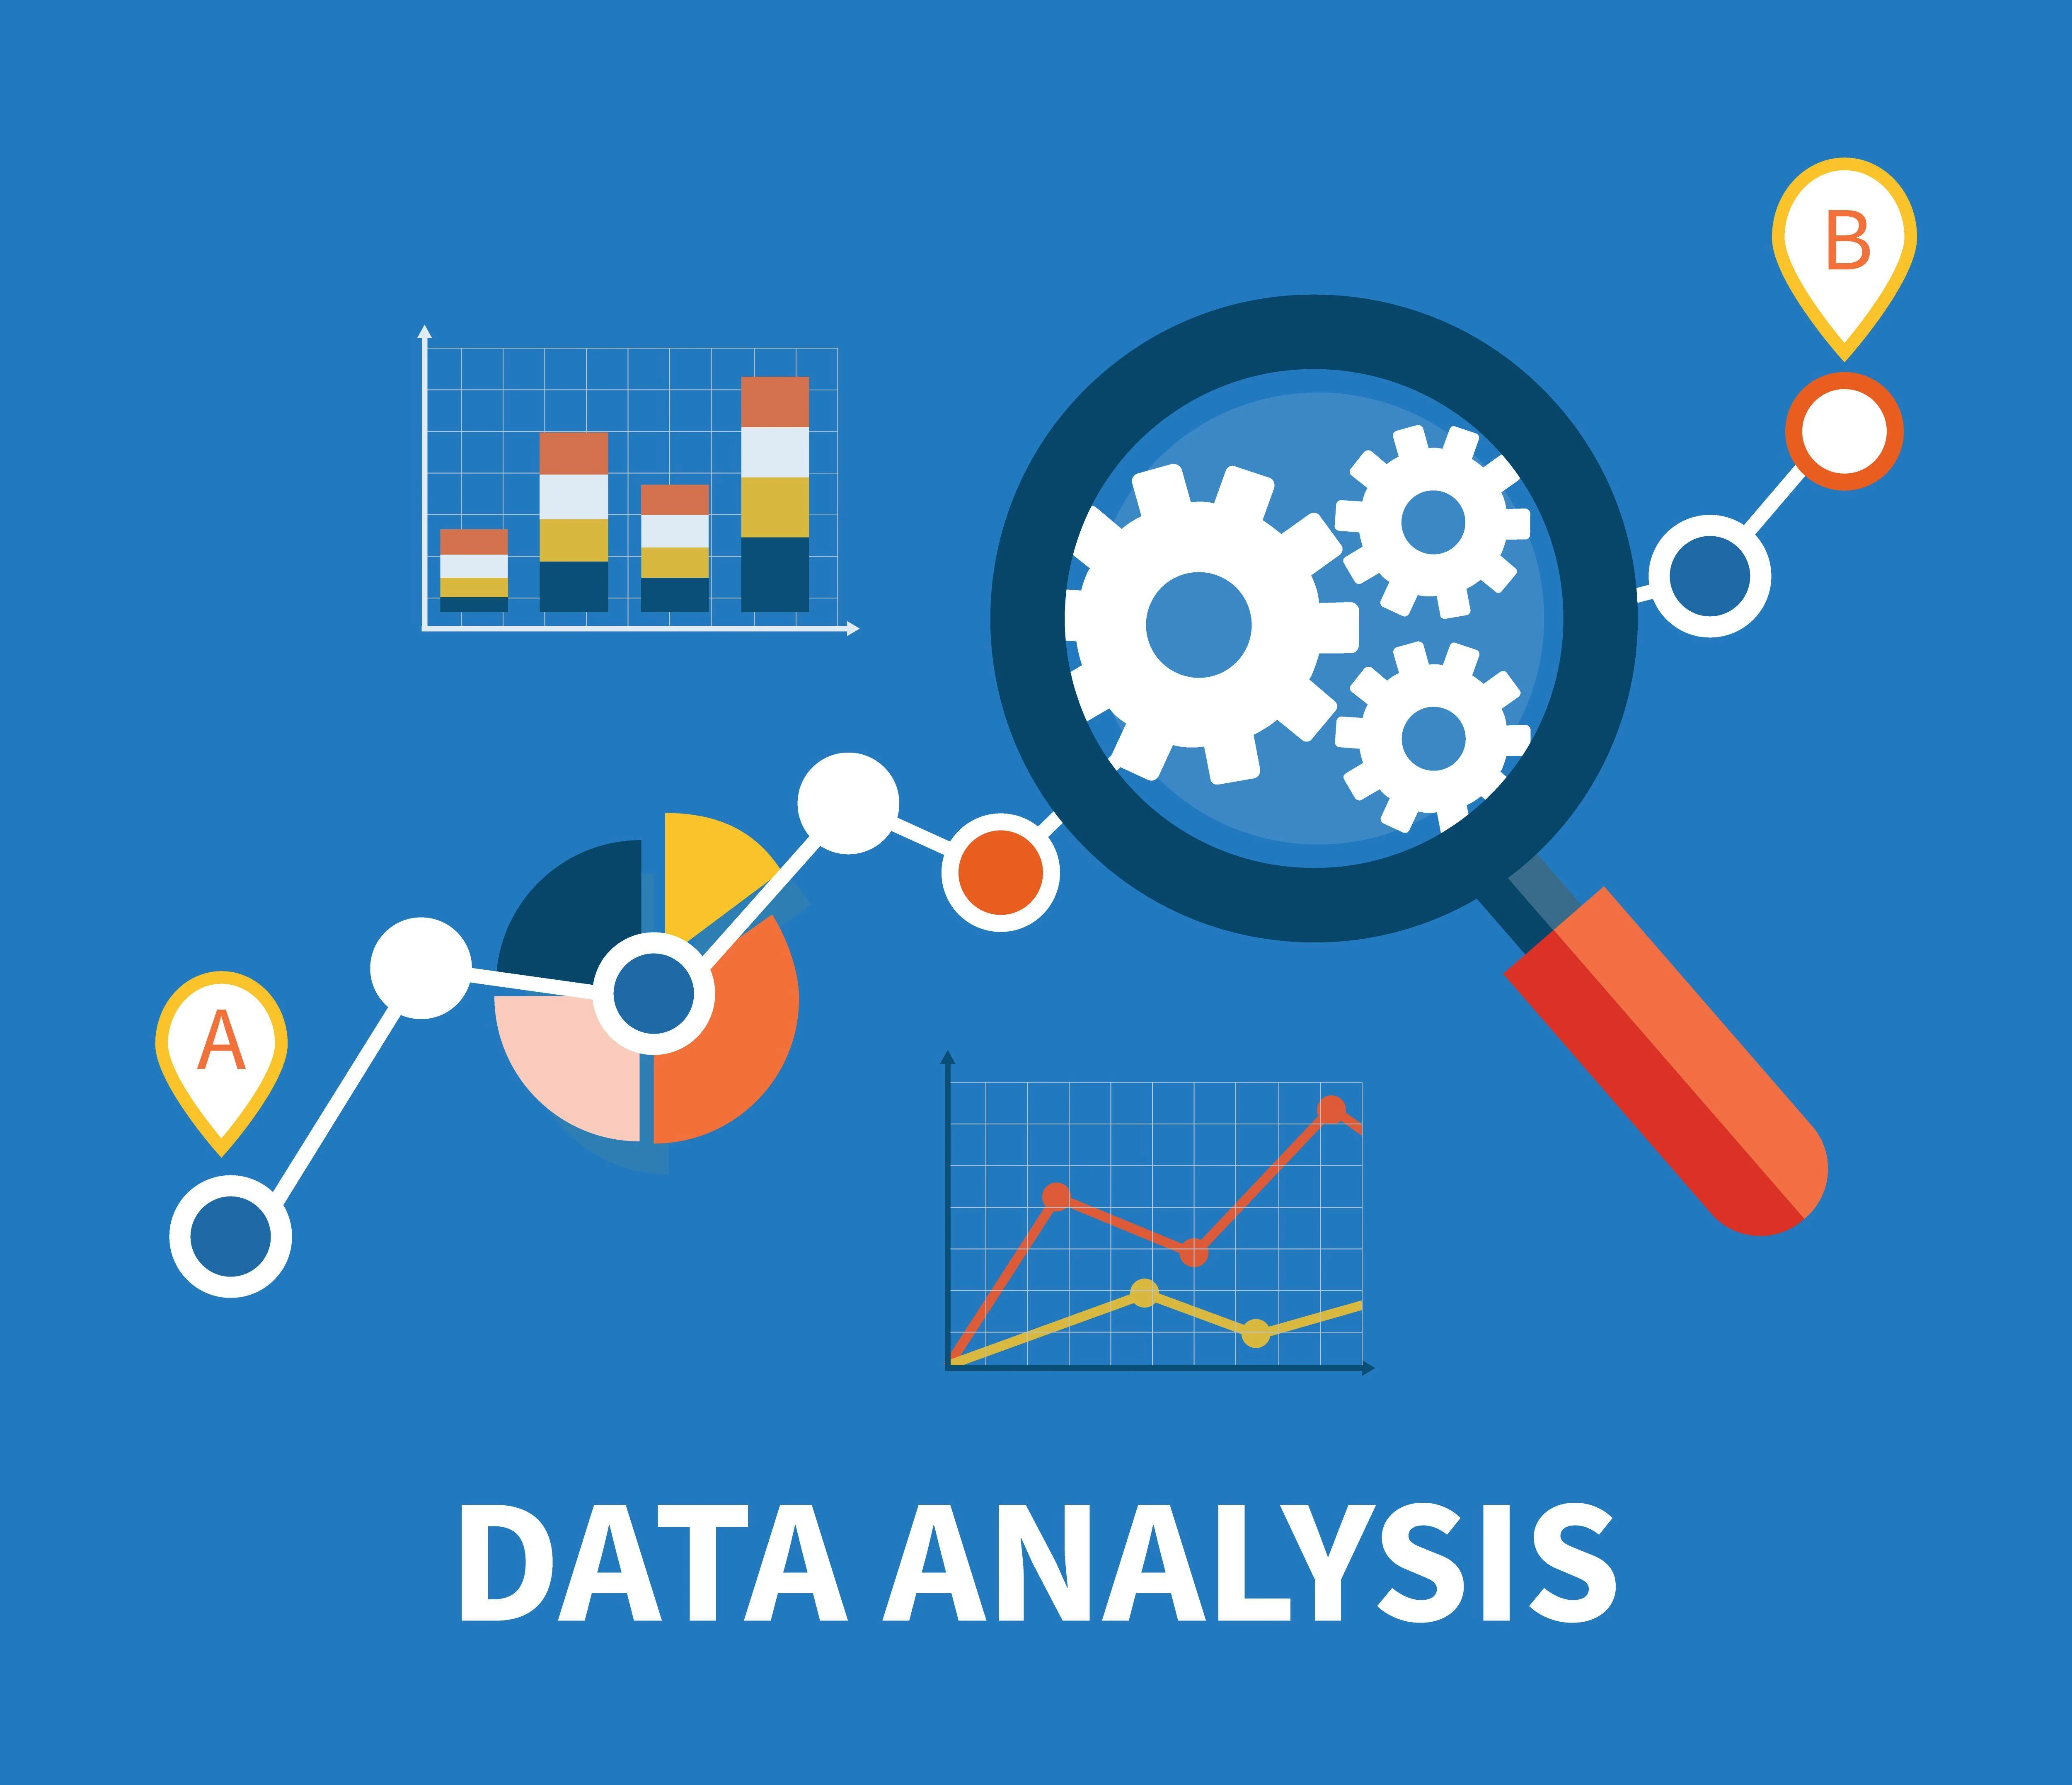

3. Data Analysis
3.1 Tasks by project
filter tasks by project and then analyse
number of tasks by package
time taken to close out a task
tasks in order of priority
tasks in order of task group
tasks in order of cause

In [51]:
pf_tasks.head()

Ref                Status  \
0  T1.23963030                  Open   
1  T116412.200                Closed   
2   T141663.27  EHS Good Observation   
3  T116412.199                Closed   
4   T141663.26  EHS Good Observation   

                                            Location  \
0  JPC Project Management>EHS Management>01 Inspe...   
1  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
2  JPC Project Management>EHS Management>01 Inspe...   
3  QC & BC(A)R>ITP 02 Architectural & M&E Service...   
4  JPC Project Management>EHS Management>01 Inspe...   

                                         Description    Created   Target  \
0  task raised in incorrect location of this form... 2020-09-14  44011.0   
1                                             Metsec 2020-09-14  44011.0   
2  Good clear exclusion zones and access through ... 2020-09-14  44011.0   
3                                           RC walls 2020-09-14  44011.0   
4  block 02 working level has good housekeeping, ... 2020-09-14  44011.0   

                                       Type             To Package  \
0     Safety Notice (Amber) - General Issue        Main Contractor   
1                      JPC - Progress Photo  Ceilings & Partitions   
2  Safety Notice (Green) - Good Observation        Main Contractor   
3                      JPC - Progress Photo       Precast Concrete   
4  Safety Notice (Green) - Good Observation       Precast Concrete   

  Status Changed Association  OverDue Images Comments Documents  \
0     2020-09-14  FormAnswer    False    N/A      N/A       N/A   
1     2020-09-14  FormAnswer    False   True    False     False   
2     2020-09-14  FormAnswer    False   True    False     False   
3     2020-09-14  FormAnswer    False   True    False     False   
4     2020-09-14  FormAnswer    False   True    False     False   

              Priority                          Cause  project Report Status  \
0  Behavioural Failure   JPC - Safety - Documentation     1328          Open   
1                Other  JPC - Safety - House Keeping      1328        Closed   
2  Behavioural Failure          JPC - Safety - Access     1328        Closed   
3                Other  JPC - Safety - House Keeping      1328        Closed   
4  Behavioural Failure   JPC - Safety - House Keeping     1328        Closed   

        Task Group  
0           Safety  
1  Site Management  
2           Safety  
3  Site Management  
4           Safety

To simplify things, we will drop a few of the columns which are of less use to us. Namely, 'Target', 'Association','Overdue', 'Images', 'Comments' and 'Documents'.

In [52]:
subset_project_tasks = pf_tasks[['Ref', 'Status', 'Location', 'Description', 'Created', 'Type', 'To Package', 'Status Changed', 'Priority', 'Cause', 'project', 'Report Status', 'Task Group']]
subset_project_tasks.dtypes

Ref                       object
Status                    object
Location                  object
Description               object
Created           datetime64[ns]
Type                      object
To Package                object
Status Changed    datetime64[ns]
Priority                  object
Cause                     object
project                    int64
Report Status             object
Task Group                object
dtype: object

In [53]:
subset_project_tasks.shape

(12424, 13)

In [54]:
#filter tasks by project and then analyse 
data_by_project = subset_project_tasks.drop(columns=['Status', 'Location', 'Description', 'Created', 'Type', 'To Package', 'Status Changed', 'Priority', 'Cause', 'Report Status', 'Task Group'])

In [55]:
data_by_project = data_by_project.groupby(by = 'project').count().rename(columns = {'Ref' : 'Quantity'}).reset_index()
data_by_project

project  Quantity
0     1328      3751
1     1329       478
2     1330      3684
3     1335      1267
4     1338      1308
5     1340       995
6     1343       381
7     1345       560

In [56]:
trace1 = go.Pie(labels = data_by_project['project'],
             values = data_by_project['Quantity'],
              
            title = 'Number of tasks per project'),
           
fig = go.Figure(trace1)
fig.update_layout(legend_title_text = 'Project Ref.') 
fig.show()